<a href="https://colab.research.google.com/github/vignesh0361/Pyspark/blob/main/2_A_file_processing_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"races.csv"

## Data loading

### Subtask:
Load the "races.csv" dataset into a Pandas DataFrame.


**Reasoning**:
Import pandas and load the "races.csv" dataset into a Pandas DataFrame named `df_races` and display the first 5 rows.



In [1]:
import pandas as pd

df_races = pd.read_csv('races.csv')
display(df_races.head())

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


## Data exploration

### Subtask:
Explore the loaded dataset `df_races` to understand its characteristics.


**Reasoning**:
Explore the dataset characteristics as instructed, including shape, data types, descriptive statistics, missing values, and unique values for categorical columns.



In [2]:
# Examine the shape of the DataFrame
print("DataFrame Shape:", df_races.shape)

# Check the data types of each column
print("\nData Types:\n", df_races.dtypes)

# Explore the descriptive statistics of numerical columns
print("\nDescriptive Statistics:\n", df_races.describe())

# Identify any missing values
print("\nMissing Values:\n", df_races.isnull().sum())

# Explore the unique values for categorical columns
print("\nUnique Circuits:", df_races['circuitId'].nunique())
print("Unique Years:", df_races['year'].nunique())

DataFrame Shape: (1058, 8)

Data Types:
 raceId        int64
year          int64
round         int64
circuitId     int64
name         object
date         object
time         object
url          object
dtype: object

Descriptive Statistics:
             raceId         year        round    circuitId
count  1058.000000  1058.000000  1058.000000  1058.000000
mean    531.231569  1990.780718     8.382798    22.089792
std     308.165709    19.730088     5.000281    17.154605
min       1.000000  1950.000000     1.000000     1.000000
25%     265.250000  1976.000000     4.000000     9.000000
50%     529.500000  1992.000000     8.000000    18.000000
75%     793.750000  2008.000000    12.000000    32.000000
max    1073.000000  2021.000000    23.000000    77.000000

Missing Values:
 raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64

Unique Circuits: 75
Unique Years: 72


## Data analysis

### Subtask:
Analyze the `df_races` DataFrame to gain insights into the distribution of variables, potential relationships between variables, and identify any interesting patterns in the Formula 1 race data.


**Reasoning**:
Analyze the distribution of races over time (year) by plotting a histogram or line chart to visualize the number of races held each year and identify any trends.



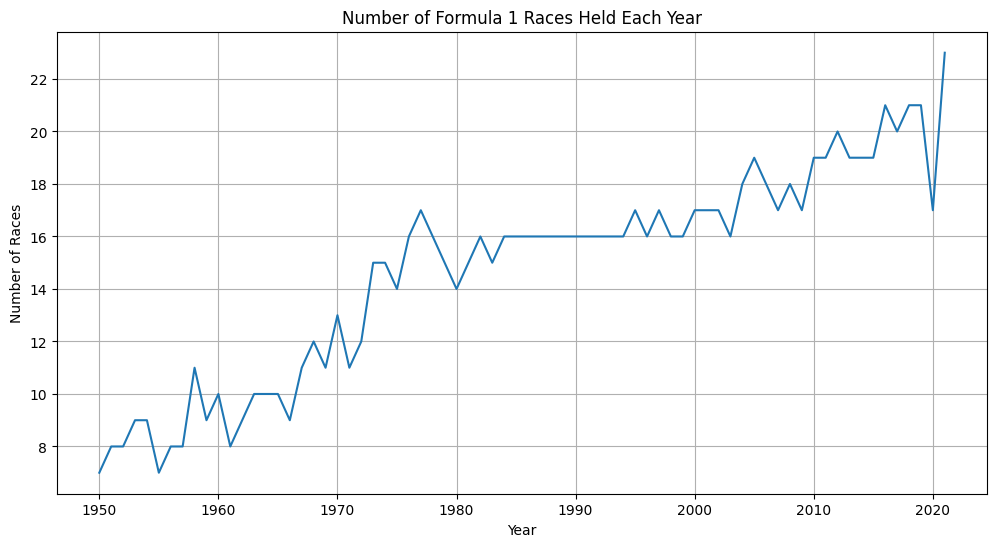

In [3]:
import matplotlib.pyplot as plt

# Group races by year and count the number of races in each year
races_per_year = df_races.groupby('year')['raceId'].count()

# Create a line chart to visualize the number of races over time
plt.figure(figsize=(12, 6))
plt.plot(races_per_year.index, races_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Number of Formula 1 Races Held Each Year')
plt.grid(True)
plt.show()

**Reasoning**:
Explore the relationship between the number of races and the circuit by creating a bar chart showing the number of races held at each circuit and analyze which circuits have hosted the most races.



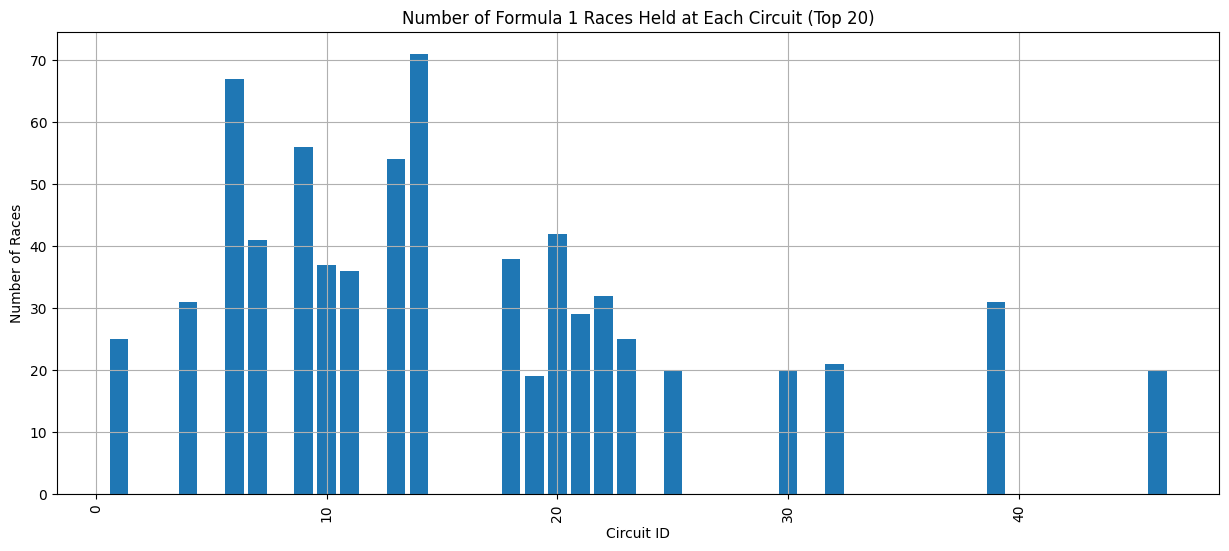

In [4]:
# Group races by circuitId and count the number of races at each circuit
races_per_circuit = df_races.groupby('circuitId')['raceId'].count()

# Sort the circuits by the number of races in descending order
sorted_races_per_circuit = races_per_circuit.sort_values(ascending=False)

# Create a bar chart to visualize the number of races held at each circuit
plt.figure(figsize=(15, 6))
plt.bar(sorted_races_per_circuit.index[:20], sorted_races_per_circuit.values[:20])  # Show top 20 circuits
plt.xlabel('Circuit ID')
plt.ylabel('Number of Races')
plt.title('Number of Formula 1 Races Held at Each Circuit (Top 20)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Reasoning**:
Investigate the distribution of races by round using a histogram or bar chart to identify any patterns or trends.



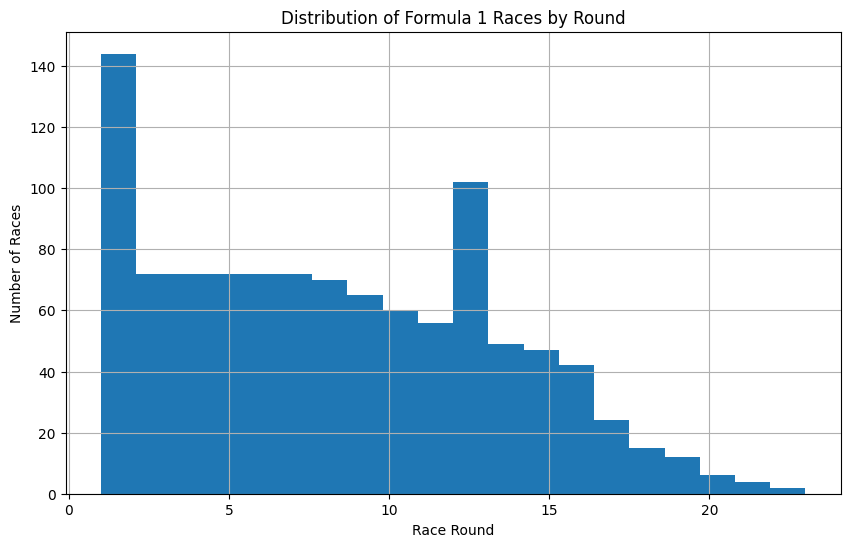

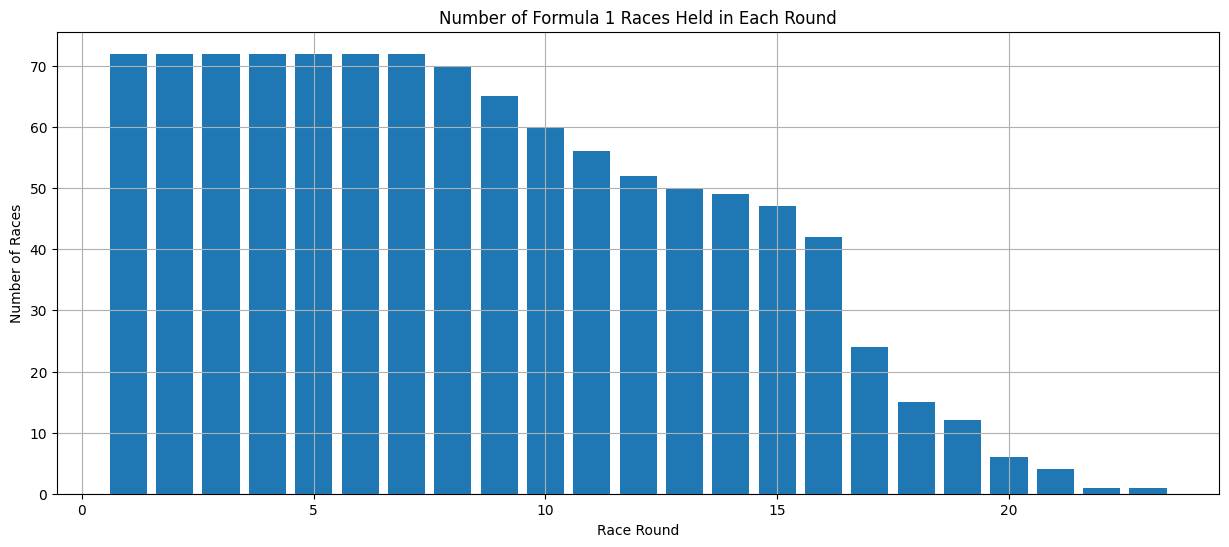

In [5]:
# Create a histogram to visualize the distribution of races across different rounds
plt.figure(figsize=(10, 6))
plt.hist(df_races['round'], bins=20)
plt.xlabel('Race Round')
plt.ylabel('Number of Races')
plt.title('Distribution of Formula 1 Races by Round')
plt.grid(True)
plt.show()

# Analyze the distribution of races by round using a bar chart
races_per_round = df_races.groupby('round')['raceId'].count()
plt.figure(figsize=(15, 6))
plt.bar(races_per_round.index, races_per_round.values)
plt.xlabel('Race Round')
plt.ylabel('Number of Races')
plt.title('Number of Formula 1 Races Held in Each Round')
plt.grid(True)
plt.show()

**Reasoning**:
Explore the time of year when races are held by analyzing the `date` column to identify the months or seasons when most races are held, using a histogram or bar chart of the month the race was held.



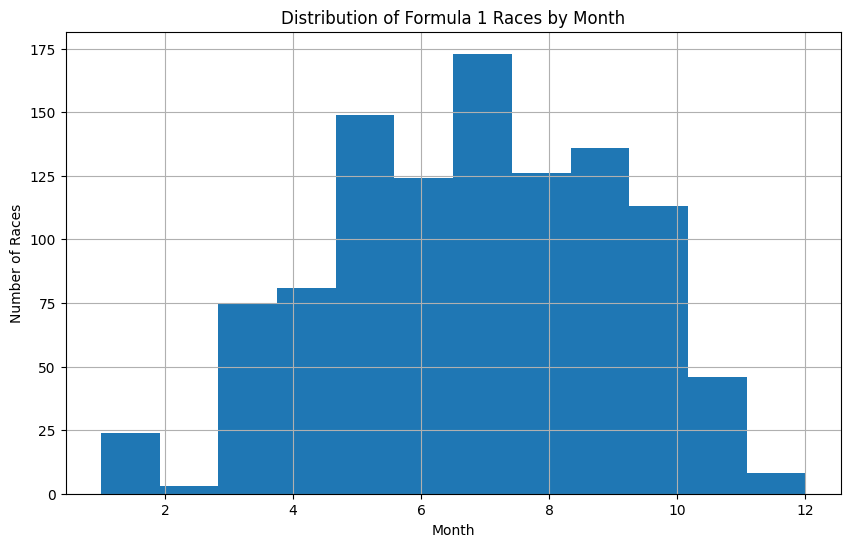

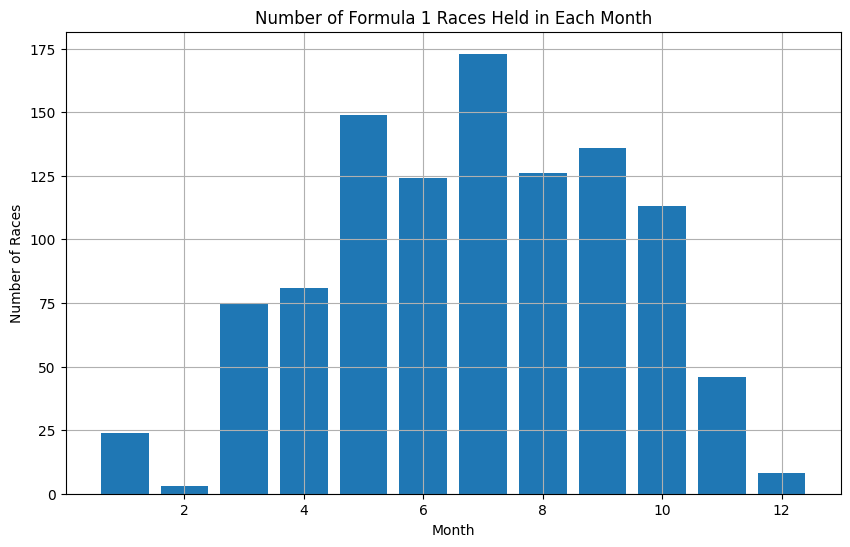

In [6]:
# Convert the 'date' column to datetime objects
df_races['date'] = pd.to_datetime(df_races['date'])

# Extract the month from the 'date' column
df_races['month'] = df_races['date'].dt.month

# Create a histogram to visualize the distribution of races across different months
plt.figure(figsize=(10, 6))
plt.hist(df_races['month'], bins=12)
plt.xlabel('Month')
plt.ylabel('Number of Races')
plt.title('Distribution of Formula 1 Races by Month')
plt.grid(True)
plt.show()

# Analyze the distribution of races by month using a bar chart
races_per_month = df_races.groupby('month')['raceId'].count()
plt.figure(figsize=(10, 6))
plt.bar(races_per_month.index, races_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Races')
plt.title('Number of Formula 1 Races Held in Each Month')
plt.grid(True)
plt.show()

## Summary:

## Summary of Formula 1 Race Data Analysis

### 1. Q&A
(No questions were explicitly asked in the provided analysis.)


### 2. Data Analysis Key Findings
* **Increasing Number of Races:** The number of Formula 1 races held each year has been generally increasing over time, as shown by the line chart.
* **Top Circuits:** Certain circuits host a significantly larger number of races compared to others. The analysis revealed the top 20 circuits with the most races held.
* **Race Round Distribution:** The distribution of races across different rounds within a season shows some patterns, potentially indicating how race scheduling is structured.
* **Seasonal Race Concentration:**  The analysis identified that a higher number of races are typically held during certain months of the year, highlighting a clear seasonal trend in Formula 1 racing.


### 3. Insights or Next Steps
* **Investigate the reasons behind the increase in races:** Further analysis could explore factors contributing to the growing number of Formula 1 races over time, such as increased popularity, expanded markets, or changes in the racing calendar.
* **Analyze circuit popularity in relation to factors like location, track characteristics, and fan base:**  Understanding why certain circuits are more popular than others could provide insights into fan preferences and the appeal of different racing venues.


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Read data from the spreadsheet (CSV or Excel)
df = pd.read_csv('error_data.csv')  # Use pd.read_excel('error_data.xlsx') for Excel files

# Preview the data (optional)
print(df.head())

# Step 2: Preprocess the data
# Convert the 'Error Message' column into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Error Message'])

# Target labels: 'Corrective Action'
y = df['Corrective Action']

# Step 3: Train the model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 5: Predict corrective action for a new error message
def predict_corrective_action(error_message):
    error_message_transformed = vectorizer.transform([error_message])
    prediction = model.predict(error_message_transformed)
    return prediction[0]

# Example prediction
error_message_input = 'Database connection timed out. Please check the network or increase the timeout settings.'
suggested_action = predict_corrective_action(error_message_input)
print(f"Error Message: {error_message_input}\nSuggested Corrective Action: {suggested_action}")


Accuracy: 0.0000
Error Code: 501
Suggested Corrective Action: Check request syntax or payload format.
